Alright, everyone, let’s take our exploration of mass spectrometry a step further. In our previous sessions, we've been focusing on how to calculate the monoisotopic masses for both y- and b-fragment peaks. Today, we're going to use what we've learned and apply it to a real-world scenario.

Imagine we have a protein, identified by the accession number 'Q13740-1.' Our goal is to figure out which specific part, or peptide, of this protein matches the best with an experimental spectrum we have. This is not just about finding a match; it’s about finding the best match, which can tell us a lot about the protein’s structure and function.

In [12]:
#!pip install pyteomics

In [13]:
from pyteomics import mzml
from matplotlib import pyplot as plt

In [14]:
# 1 Find count of tyrptic peptides in protein P00533-1
aa_mass = {
        'A': 71.0371137,
        'R': 156.1011110,
        'N': 114.0429274,
        'D': 115.0269430,
        'C': 103.0091847,
        'E': 129.0425930,
        'Q': 128.0585775,
        'G': 57.0214637,
        'H': 137.0589118,
        'I': 113.0840639,
        'L': 113.0840639,
        'K': 128.0949630,
        'M': 131.0404849,
        'F': 147.068414,
        'P': 97.0527638,
        'S': 87.0320284,
        'T': 101.0476784,
        'W': 186.0793129,
        'Y': 163.0633285,
        'V': 99.068414
    }

fasta1 = open('P00533-1.fasta', 'r')
#protein sequence is read froma FASTA file
prot_seq = fasta1.readlines()[1:]
#removes the first line of the FASTA file (header) and stores the sequence in variable prot_seq
proteinSequence = ''.join(prot_seq)
#concatenation of the lines and stored in variable proteinSequence
proteinSequence = proteinSequence.replace("\n","")
#replaces all newline characters from variable protein sequence
#print(len(proteinSequence))


In [15]:
def getTrypticPeptides(proteinSequence):
    peptides = []
    last_broken_at = 0
    for aa_position in range(0, len(proteinSequence) - 1):
        amino_acid = proteinSequence[aa_position]
        next_amino_acid = proteinSequence[aa_position + 1]
        if (amino_acid == "K" or amino_acid == "R") and next_amino_acid != "P":
            peptide = proteinSequence[last_broken_at:aa_position + 1]
            peptides.append(peptide)
            last_broken_at = aa_position + 1
    return peptides

trypticpeptides = getTrypticPeptides(proteinSequence)

print(trypticpeptides)
print(len(trypticpeptides))

if len(trypticpeptides) < 8:
    print()


['MFNNCEVVLGNLEITYVQR', 'NYDLSFLK', 'TIQEVAGYVLIALNTVER', 'IPLENLQIIR', 'GNMYYENSYALAVLSNYDANK', 'TGLK', 'ELPMR', 'NLQEILHGAVR', 'FSNNPALCNVESIQWR', 'DIVSSDFLSNMSMDFQNHLGSCQK', 'CDPSCPNGSCWGAGEENCQK', 'LTK', 'IICAQQCSGR', 'CR', 'GK', 'SPSDCCHNQCAAGCTGPR', 'ESDCLVCR', 'K', 'FR', 'DEATCK', 'DTCPPLMLYNPTTYQMDVNPEGK', 'YSFGATCVK', 'K', 'CPR', 'NYVVTDHGSCVR', 'ACGADSYEMEEDGVR', 'K', 'CK', 'K', 'CEGPCR', 'K', 'VCNGIGIGEFK', 'DSLSINATNIK', 'HFK', 'NCTSISGDLHILPVAFR', 'GDSFTHTPPLDPQELDILK', 'TVK', 'EITGFLLIQAWPENR', 'TDLHAFENLEIIR', 'GR', 'TK', 'QHGQFSLAVVSLNITSLGLR', 'SLK', 'EISDGDVIISGNK', 'NLCYANTINWK', 'K', 'LFGTSGQK', 'TK', 'IISNR', 'GENSCK', 'ATGQVCHALCSPEGCWGPEPR', 'DCVSCR', 'NVSR', 'GR', 'ECVDK', 'CNLLEGEPR', 'EFVENSECIQCHPECLPQAMNITCTGR', 'GPDNCIQCAHYIDGPHCVK', 'TCPAGVMGENNTLVWK', 'YADAGHVCHLCHPNCTYGCTGPGLEGCPTNGPK', 'IPSIATGMVGALLLLLVVALGIGLFMR', 'R', 'R', 'HIVR', 'K', 'R', 'TLR', 'R', 'LLQER', 'ELVEPLTPSGEAPNQALLR', 'ILK', 'ETEFK', 'K', 'IK', 'VLGSGAFGTVYK', 'GLWIPEGEK', 'VK', 'IPVA

In [16]:
# 2. Create fragment mass lists for all tryptic-peptides from protein P00533-1
def getFragmentMasses(sequence, precursor_charge):
#function to calculate b and y ions series of all the peptides obtained
    n = len(sequence)
    array_holding_mass_values = []
    array_holding_b_ion_mass_values = []

    for aaIndex in range(n):
        aa = sequence[aaIndex]
        aa_mass_value = aa_mass[aa]
        array_holding_mass_values.append(aa_mass_value)
        total_mass_of_array = sum(array_holding_mass_values)
        b_mass = (total_mass_of_array + 1.0079)/precursor_charge
        b_mass_rounded = round(b_mass, 7)
        array_holding_b_ion_mass_values.append(b_mass_rounded)


    array_holding_mass_values = []
    array_holding_y_ion_mass_values = []
    for aa in sequence[::-1]:
        aa_mass_value = aa_mass[aa]
        array_holding_mass_values.append(aa_mass_value)
        total_mass_of_array = sum(array_holding_mass_values)
        y_mass = (total_mass_of_array + 18.01528 + 1.0079)/precursor_charge
        y_mass_rounded = round(y_mass, 7)
        array_holding_y_ion_mass_values.append(y_mass_rounded)

    # Returning it with a dict to make everything readable
    fragMasses = {}
    fragMasses['b_ion_masses'] = array_holding_b_ion_mass_values
    fragMasses['y_ion_masses'] = array_holding_y_ion_mass_values

    return fragMasses


In [17]:
fragMasses_for_peptide = {}

for peptide in trypticpeptides:
  #if len(peptide) > 8:
    frag_masses = getFragmentMasses(peptide, 1)
    fragMasses_for_peptide[peptide] = frag_masses

    print("For peptide: ", peptide)
    print(frag_masses)
    print("")

For peptide:  MFNNCEVVLGNLEITYVQR
{'b_ion_masses': [132.0483849, 279.1167989, 393.1597263, 507.2026537, 610.2118384, 739.2544314, 838.3228454, 937.3912594, 1050.4753233, 1107.496787, 1221.5397144, 1334.6237783, 1463.6663713, 1576.7504352, 1677.7981136, 1840.8614421, 1939.9298561, 2067.9884336, 2224.0895446], 'y_ion_masses': [175.124291, 303.1828685, 402.2512825, 565.314611, 666.3622894, 779.4463533, 908.4889463, 1021.5730102, 1135.6159376, 1192.6374013, 1305.7214652, 1404.7898792, 1503.8582932, 1632.9008862, 1735.9100709, 1849.9529983, 1963.9959257, 2111.0643397, 2242.1048246]}

For peptide:  NYDLSFLK
{'b_ion_masses': [115.0508274, 278.1141559, 393.1410989, 506.2251628, 593.2571912, 740.3256052, 853.4096691, 981.5046321], 'y_ion_masses': [147.118143, 260.2022069, 407.2706209, 494.3026493, 607.3867132, 722.4136562, 885.4769847, 999.5199121]}

For peptide:  TIQEVAGYVLIALNTVER
{'b_ion_masses': [102.0555784, 215.1396423, 343.1982198, 472.2408128, 571.3092268, 642.3463405, 699.3678042, 862.

In [18]:
def matchCountPeptideToExpSpectrum(peptide, precursor_charge, experimental_spectrum_ions, tolerance):
    # Calling function to calculate b and y fragment peaks
    fragMasses_for_peptide = getFragmentMasses(peptide, precursor_charge)
    b_ions = frag_masses['b_ion_masses']
    y_ions = frag_masses['y_ion_masses']

    # Count how many places there is a match with b and y ions to the experimental spectrum ions

    match_count = 0

    for ion in b_ions+ y_ions:
        for experimental_ion in experimental_spectrum_ions:
        # Matches only if the difference between ion value and experimental ion value is less opted tolerance
            if abs((ion - experimental_ion)/experimental_ion)*1.0e6 < tolerance:
                match_count += 1
                break

    return match_count

In [19]:
# merge the mass list of each peptide with the experimental spectrum (ignoring precursor mass)
# picking one experimental spectrum to work with
mzml_file = mzml.read("HelaOutput.mzML")
experimental_spectrum = {}

for spectrum in mzml_file:
    if spectrum['index'] == 2739:
        experimental_spectrum['intensities']  = spectrum['intensity array']
        experimental_spectrum['ions'] = spectrum['m/z array']
        break
 #  print(experimental_spectrum)


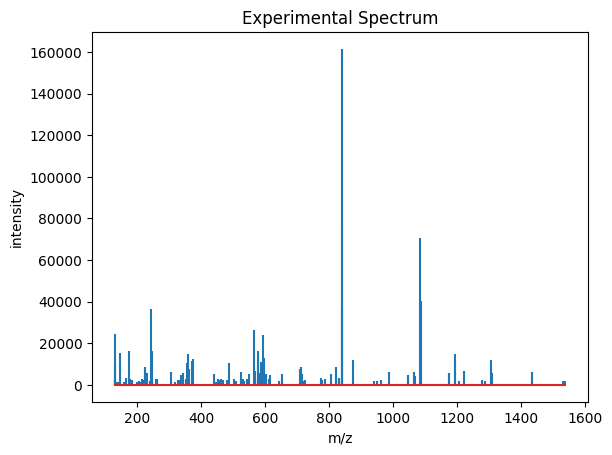

{'b_ion_masses': [132.0483849, 279.1167989, 393.1597263, 507.2026537, 610.2118384, 739.2544314, 838.3228454, 937.3912594, 1050.4753233, 1107.496787, 1221.5397144, 1334.6237783, 1463.6663713, 1576.7504352, 1677.7981136, 1840.8614421, 1939.9298561, 2067.9884336, 2224.0895446], 'y_ion_masses': [175.124291, 303.1828685, 402.2512825, 565.314611, 666.3622894, 779.4463533, 908.4889463, 1021.5730102, 1135.6159376, 1192.6374013, 1305.7214652, 1404.7898792, 1503.8582932, 1632.9008862, 1735.9100709, 1849.9529983, 1963.9959257, 2111.0643397, 2242.1048246]}



<ipython-input-20-3dcc8ebef90f>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(ionMasses['b_ion_masses'], bunchOfZeros, 'ro', c='green')
<ipython-input-20-3dcc8ebef90f>:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(ionMasses['y_ion_masses'], bunchOfZeros, 'ro', c='purple')


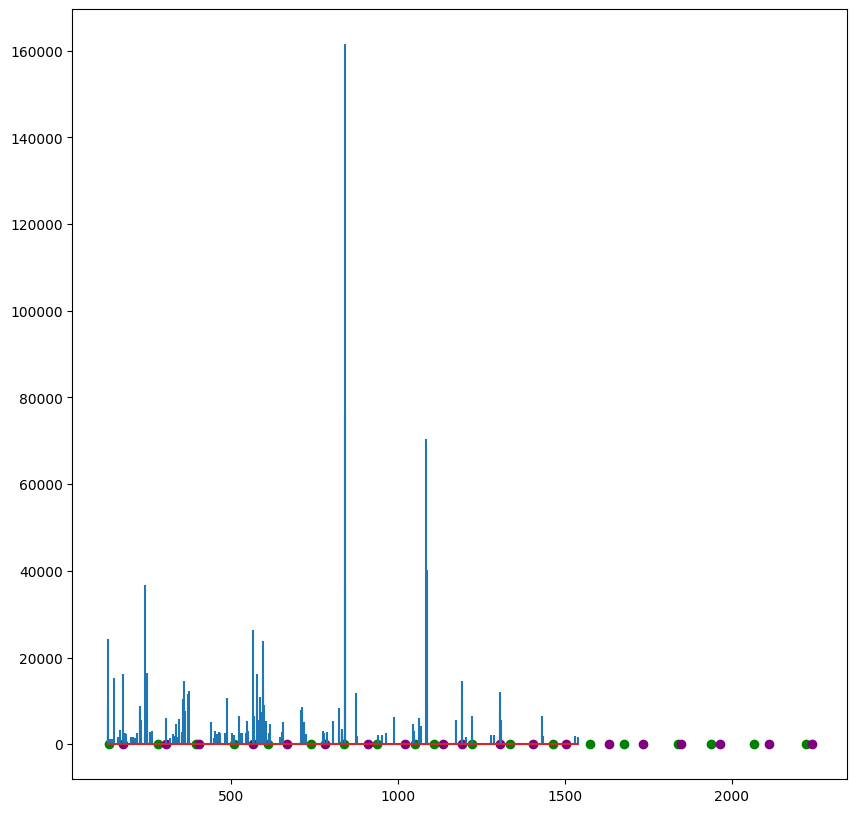

{'b_ion_masses': [115.0508274, 278.1141559, 393.1410989, 506.2251628, 593.2571912, 740.3256052, 853.4096691, 981.5046321], 'y_ion_masses': [147.118143, 260.2022069, 407.2706209, 494.3026493, 607.3867132, 722.4136562, 885.4769847, 999.5199121]}



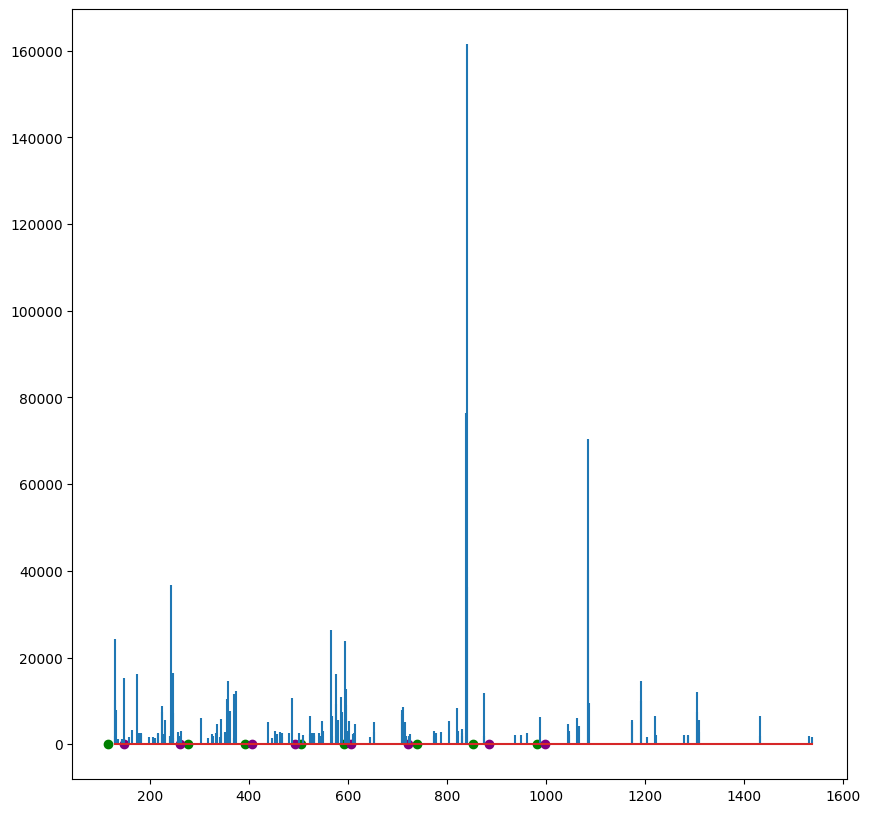

{'b_ion_masses': [102.0555784, 215.1396423, 343.1982198, 472.2408128, 571.3092268, 642.3463405, 699.3678042, 862.4311327, 961.4995467, 1074.5836106, 1187.6676745, 1258.7047882, 1371.7888521, 1485.8317795, 1586.8794579, 1685.9478719, 1814.9904649, 1971.0915759], 'y_ion_masses': [175.124291, 304.166884, 403.235298, 504.2829764, 618.3259038, 731.4099677, 802.4470814, 915.5311453, 1028.6152092, 1127.6836232, 1290.7469517, 1347.7684154, 1418.8055291, 1517.8739431, 1646.9165361, 1774.9751136, 1888.0591775, 1989.1068559]}



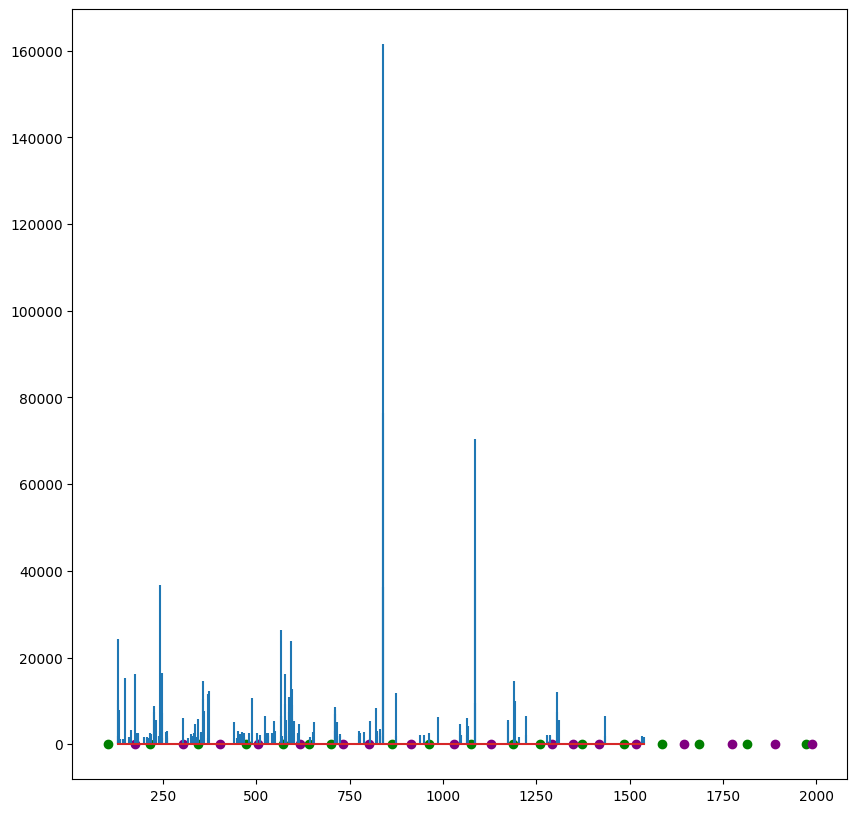

{'b_ion_masses': [114.0919639, 211.1447277, 324.2287916, 453.2713846, 567.314312, 680.3983759, 808.4569534, 921.5410173, 1034.6250812, 1190.7261922], 'y_ion_masses': [175.124291, 288.2083549, 401.2924188, 529.3509963, 642.4350602, 756.4779876, 885.5205806, 998.6046445, 1095.6574083, 1208.7414722]}



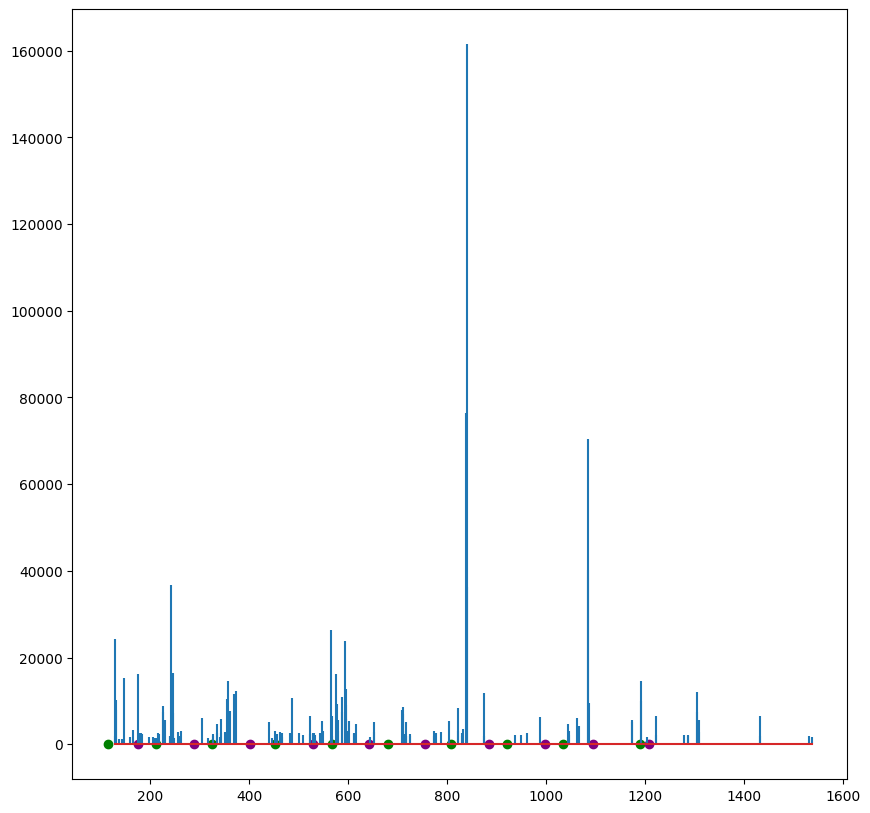

In [20]:
# just plotting the experimental spectrum
ion_values = experimental_spectrum['ions']
intensity_values = experimental_spectrum['intensities']

plt.title("Experimental Spectrum")
plt.xlabel("m/z")
plt.ylabel("intensity")

plt.stem(ion_values, intensity_values, markerfmt = " ")
plt.show()

# # plotting the ions of the tryptic peptide (only take the first 4 peptides to make plotting computationally efficient)
# Assuming intensities to be bunch of zeros, hypothetical - to match the peptides found
for peptideIndex in range(4):
  plt.rcParams["figure.figsize"]=10,10

  peptide = trypticpeptides[peptideIndex]
  ionMasses = fragMasses_for_peptide[peptide]

  print(ionMasses)
  print("")

  bunchOfZeros = [0 for ionValue in ionMasses['b_ion_masses']]
  plt.plot(ionMasses['b_ion_masses'], bunchOfZeros, 'ro', c='green')

  bunchOfZeros = [0 for ionValue in ionMasses['y_ion_masses']]
  plt.plot(ionMasses['y_ion_masses'], bunchOfZeros, 'ro', c='purple')

  plt.stem(ion_values, intensity_values, markerfmt = " ")

  plt.show()



In [21]:
# Calculate number of matching peaks (ion counts)

exp_ion_values = experimental_spectrum['ions']
for peptide in trypticpeptides:
  plt.rcParams["figure.figsize"]=10,10

  matched_ion_count = matchCountPeptideToExpSpectrum(peptide, 1, exp_ion_values, 0.01)
  print("For tryptic pepide", peptide, "matches found : ", matched_ion_count)


For tryptic pepide MFNNCEVVLGNLEITYVQR matches found :  0
For tryptic pepide NYDLSFLK matches found :  0
For tryptic pepide TIQEVAGYVLIALNTVER matches found :  0
For tryptic pepide IPLENLQIIR matches found :  0
For tryptic pepide GNMYYENSYALAVLSNYDANK matches found :  0
For tryptic pepide TGLK matches found :  0
For tryptic pepide ELPMR matches found :  0
For tryptic pepide NLQEILHGAVR matches found :  0
For tryptic pepide FSNNPALCNVESIQWR matches found :  0
For tryptic pepide DIVSSDFLSNMSMDFQNHLGSCQK matches found :  0
For tryptic pepide CDPSCPNGSCWGAGEENCQK matches found :  0
For tryptic pepide LTK matches found :  0
For tryptic pepide IICAQQCSGR matches found :  0
For tryptic pepide CR matches found :  0
For tryptic pepide GK matches found :  0
For tryptic pepide SPSDCCHNQCAAGCTGPR matches found :  0
For tryptic pepide ESDCLVCR matches found :  0
For tryptic pepide K matches found :  0
For tryptic pepide FR matches found :  0
For tryptic pepide DEATCK matches found :  0
For tryptic 